In [44]:
import jax.numpy as jnp
import jax
from jax import jit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#creating a jax array
X = [2, 4 , 6, 8, 10]
y = [1, 3, 5, 7, 9]

X = jnp.asarray(X)
y = jnp.asarray(y)

X,y

(Array([ 2,  4,  6,  8, 10], dtype=int32), Array([1, 3, 5, 7, 9], dtype=int32))

In [5]:
#convert variables to jax array
X = [[1,2,3,4,5,6,7,8,9,10], [21,22,23,24,25,26,27,28,29,30], [31,32,33,34,35,36,37,38,39,34], [1,2,3,4,5,6,7,8,9,10], [31,32,33,34,35,36,37,38,39,40]]
y = [3, 4, 5, 6, 7]

X = jnp.asarray(X)
y = jnp.asarray(y)

print(X.shape, y.shape)

(5, 10) (5,)


In [4]:
#generate a random number

key = jax.random.PRNGKey(0) #create a random key
key, subkey = jax.random.split(key) #split the key
rand = jax.random.normal(subkey, (3,3)) #generate a random number
print(rand)

2024-05-31 21:29:07.863510: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.4 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


[[-0.38812608 -0.04487164 -2.0427258 ]
 [ 0.07932311 -0.04617044  0.7959976 ]
 [-1.4411978  -1.6929979  -0.37369204]]


In [8]:
X = jnp.asarray([1,2,3,4,5,6,7,8,9,10])
X = X.reshape(-1,1)

print(f"X: {X}")

ones = jnp.ones((X.shape[0], 1))
X = jnp.append(X, ones, axis=1)

print(f"X new: {X}")

X: [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
X new: [[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]]


<Axes: >

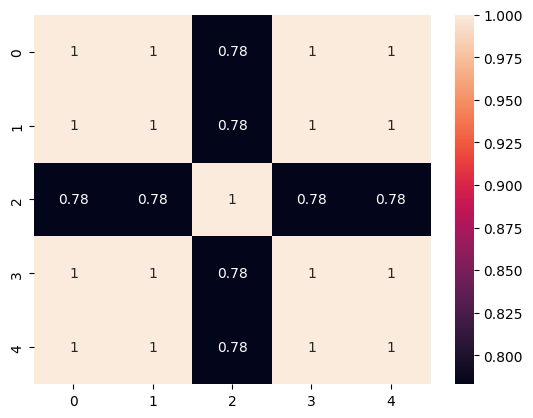

In [21]:
# easly making correlation matrix

X = [[1,2,3,4,5,6,7,8,9,10], [21,22,23,24,25,26,27,28,29,30], [31,32,33,34,35,36,37,38,39,34], [1,2,3,4,5,6,7,8,9,10], [31,32,33,34,35,36,37,38,39,40]]\

X = jnp.asarray(X)
corref_matrix = jnp.corrcoef(X)
sns.heatmap(corref_matrix, annot=True)

In [26]:
upper = jnp.triu(corref_matrix, k=1)
to_drop = jnp.where(jnp.abs(upper) > 0.95)
print(upper)

[[0.         0.99999994 0.78296727 0.99999994 0.99999994]
 [0.         0.         0.78296727 0.99999994 0.99999994]
 [0.         0.         0.         0.78296727 0.78296727]
 [0.         0.         0.         0.         0.99999994]
 [0.         0.         0.         0.         0.        ]]


In [33]:
#standardize the data
std_dev = jnp.std(X)
mean = jnp.mean(X)

print(f"std_dev: {std_dev}, mean: {mean}")

std_dev: 1.0, mean: -2.38418573772492e-09


In [30]:
X = (X - mean) / std_dev
X

Array([[-1.1795357 , -1.1795357 , -1.1795357 , -1.1795357 , -1.1795357 ,
        -1.1795357 , -1.1795357 , -1.1795357 , -1.1795357 , -1.1843412 ],
       [ 0.29488394,  0.29488394,  0.29488394,  0.29488394,  0.29488394,
         0.29488394,  0.29488394,  0.29488394,  0.29488394,  0.41611978],
       [ 1.0320938 ,  1.0320938 ,  1.0320938 ,  1.0320938 ,  1.0320938 ,
         1.0320938 ,  1.0320938 ,  1.0320938 ,  1.0320938 ,  0.73621196],
       [-1.1795357 , -1.1795357 , -1.1795357 , -1.1795357 , -1.1795357 ,
        -1.1795357 , -1.1795357 , -1.1795357 , -1.1795357 , -1.1843412 ],
       [ 1.0320938 ,  1.0320938 ,  1.0320938 ,  1.0320938 ,  1.0320938 ,
         1.0320938 ,  1.0320938 ,  1.0320938 ,  1.0320938 ,  1.2163503 ]],      dtype=float32)

In [35]:
#One hot encoding
X = jnp.asarray([0,1,2,3,1,1,2,0,0,3,3])
num_classes = len(jnp.unique(X))
X_encode = jax.nn.one_hot(X, num_classes)
X_encode

Array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [36]:
#using jit to speed up the code
def softmax(x):
    return jnp.exp(x) / jnp.sum(jnp.exp(x))

x = jnp.asarray([1,2,3,4,5])
%timeit softmax(x)


58 μs ± 861 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [37]:
_ = jit(softmax)

%timeit softmax(x)

58.4 μs ± 1.27 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [46]:
import jax
import jax.numpy as jnp
from jax import vmap

# usando derivadas
def f(x):
    return x**2 + 6*x + 9

df_dx = jax.grad(f)

x = jnp.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10],  dtype=jnp.float32)

result_f = vmap(f)(x)
result_df_dx = vmap(df_dx)(x)

print("Resultados de f(x):", result_f)
print("Resultados de df/dx:", result_df_dx)

Resultados de f(x): [ 49.  36.  25.  16.   9.   4.   1.   0.   1.   4.   9.  16.  25.  36.
  49.  64.  81. 100. 121. 144. 169.]
Resultados de df/dx: [-14. -12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.
  14.  16.  18.  20.  22.  24.  26.]


In [48]:
%timeit result_f = vmap(f)(x)
%timeit result_df_dx = vmap(df_dx)(x)

_ = jit(vmap(f))
_ = jit(vmap(df_dx))

%timeit result_f = vmap(f)(x)
%timeit result_df_dx = vmap(df_dx)(x)

660 μs ± 5.73 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.85 ms ± 26.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
663 μs ± 1.33 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.82 ms ± 17.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


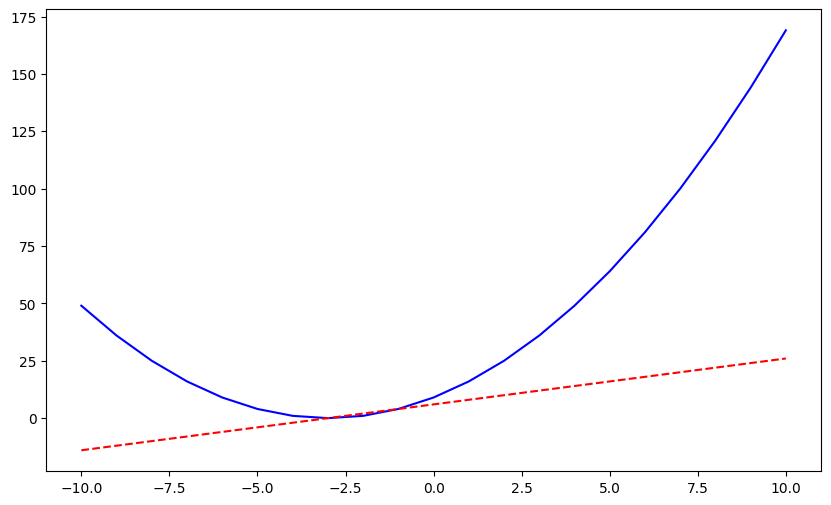

In [47]:
fig = plt.figure(figsize=(10, 6))
plt.plot(x, result_f, label="f(x)", color="blue")
plt.plot(x, result_df_dx, label="df/dx", linestyle="--", color="red")

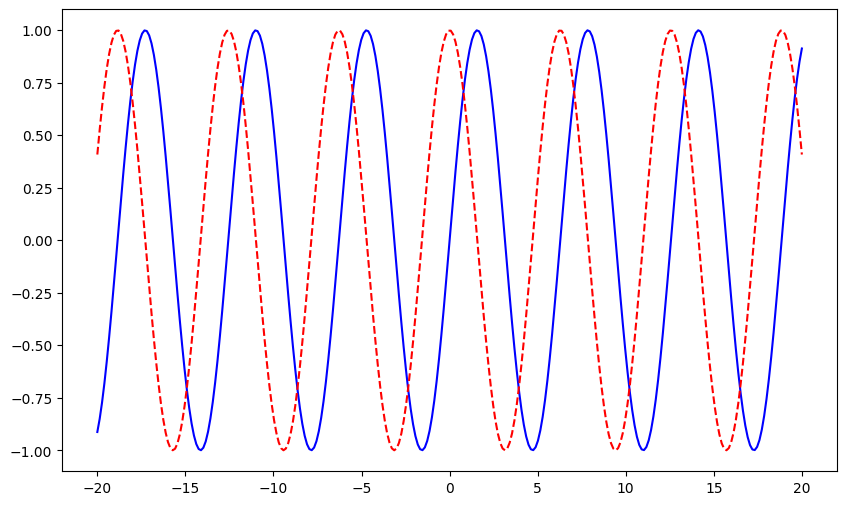

In [52]:
x = jnp.linspace(-20, 20, 300)

cos = jax.grad(jnp.sin)

result_f = vmap(jnp.sin)(x)
result_df_dx = vmap(cos)(x)

fig = plt.figure(figsize=(10, 6))
plt.plot(x, result_f, label="f(x)", color="blue")
plt.plot(x, result_df_dx, label="df/dx", linestyle="--", color="red")